In [271]:
import pandas as pd
import numpy as np
import os 
import kaggle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer, ColumnTransformer
from sklearn.model_selection import StratifiedKFold, cross_val_score, cross_val_predict, GridSearchCV, RandomizedSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier, StackingClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from scipy.stats import randint
from tabulate import tabulate
from joblib import dump

In [225]:
X_train = pd.read_csv('../data/processed/X_train.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')
y_train = np.array(y_train)
y_train = y_train.flatten()

In [226]:
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 5, 10],  # Minimum number of samples required at each leaf node
    'max_features': [None,'log2', 'sqrt',0.5],  # Number of features to consider when looking for the best split
    'bootstrap': [True, False]  # Whether bootstrap samples are used when building trees
}

param_serach = GridSearchCV(
    estimator=RandomForestClassifier(), param_grid=param_grid,
    cv=5, scoring='f1',verbose=1
)

In [227]:
param_serach.fit(X_train,y_train)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20],
                         'max_features': [None, 'log2', 'sqrt', 0.5],
                         'min_samples_leaf': [1, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=1)

In [228]:
rf_params = param_serach.best_params_
rf_score = param_serach.best_score_

In [229]:
print("Best Parameters:", rf_params)
print("Best Score:", rf_score)

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Best Score: 0.8916776583526291


In [230]:
param_grid_svm = {
    'C': [0.1, 1, 10, 100],             # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type
    'gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient for 'rbf' and 'poly'
    'shrinking': [True, False],         # Whether to use the shrinking heuristic
    'probability': [True, False],       # Whether to enable probability estimates
    'class_weight': [None, 'balanced'], # Weights associated with classes
    'random_state': [42]                # Random seed for reproducibility
}
param_serach = GridSearchCV(
    estimator=SVC(), param_grid=param_grid_svm,
    cv=5, scoring='f1',verbose=1
)

In [231]:
param_serach.fit(X_train,y_train)

Fitting 5 folds for each of 384 candidates, totalling 1920 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100],
                         'class_weight': [None, 'balanced'],
                         'gamma': ['scale', 'auto', 0.1, 1],
                         'kernel': ['linear', 'rbf', 'poly'],
                         'probability': [True, False], 'random_state': [42],
                         'shrinking': [True, False]},
             scoring='f1', verbose=1)

In [232]:
svc_params = param_serach.best_params_
svc_score = param_serach.best_score_

In [233]:
print("Best Parameters:", svc_params)
print("Best Score:", svc_score)

Best Parameters: {'C': 1, 'class_weight': None, 'gamma': 'auto', 'kernel': 'rbf', 'probability': True, 'random_state': 42, 'shrinking': True}
Best Score: 0.8926318173676844


In [234]:
param_grid_logreg = {
    'penalty': ['l1', 'l2'],          # Penalty norm ('l1' for Lasso, 'l2' for Ridge)
    'C': [0.001, 0.01, 0.1, 1, 10],   # Inverse of regularization strength (smaller values specify stronger regularization)
    'solver': ['liblinear', 'saga'], # Algorithm to use in the optimization problem
    'max_iter': [100, 200, 300]       # Maximum number of iterations for the optimization algorithm
}
param_serach = GridSearchCV(
    estimator=LogisticRegression(), param_grid=param_grid_logreg,
    cv=5, scoring='f1',verbose=1
)

In [235]:
param_serach.fit(X_train,y_train)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the 

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']},
             scoring='f1', verbose=1)

In [236]:
lreg_params = param_serach.best_params_
lreg_score = param_serach.best_score_

In [237]:
print("Best Parameters:", lreg_params)
print("Best Score:", lreg_score)

Best Parameters: {'C': 1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.8811640637489591


In [238]:
best_rf = RandomForestClassifier(**rf_params)
best_svc = SVC(**svc_params)
best_logreg = LogisticRegression(**lreg_params)
rf_ada = AdaBoostClassifier(best_rf,n_estimators=30,learning_rate=0.5,random_state=42)
models = [best_svc,best_logreg,rf_ada]

In [239]:
def evaluate(models):
    metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'F1': []}
    
    for m in models:
        skf = StratifiedKFold(n_splits=5)
        y_pred = cross_val_predict(m, X_train, y_train, cv=skf)
        
        accuracy = accuracy_score(y_train, y_pred)
        precision = precision_score(y_train, y_pred)
        recall = recall_score(y_train, y_pred)
        f1 = f1_score(y_train, y_pred)
        
        metrics['Model'].append(str(m).split('(')[0])
        metrics['Accuracy'].append(accuracy)
        metrics['Precision'].append(precision)
        metrics['Recall'].append(recall)
        metrics['F1'].append(f1)
    
    df_metrics = pd.DataFrame(metrics)
    df_metrics = df_metrics.sort_values(by='F1', ascending=False)
    
    # Plot metrics in a 2x2 grid
    fig, axes = plt.subplots(2, 2, figsize=(12, 8))
    ax_iter = axes.flat
    
    palette = sns.color_palette("pastel", len(models))  # Assign a color palette to models

    for metric in df_metrics.columns[1:]:
        ax = next(ax_iter)
        sns.barplot(data=df_metrics, x='Model', y=metric, ax=ax,hue='Model',legend=False)
        ax.set_title(metric)
        ax.set_ylabel('Score')
        ax.set_xlabel('Model')
        ax.tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

    # Print the results in a formatted table
    print(tabulate(df_metrics, headers='keys', tablefmt='pretty', showindex=False))
    return df_metrics



c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
c:\Users\aorti\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is 

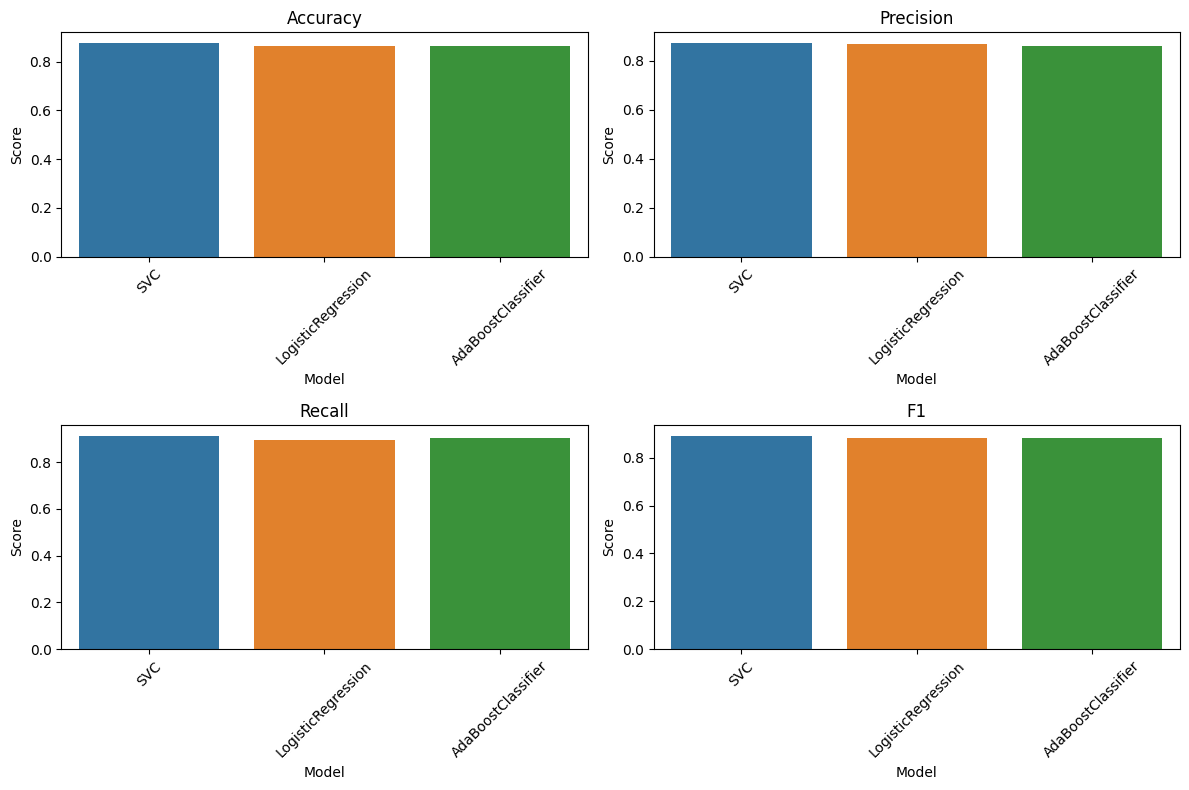

+--------------------+--------------------+--------------------+--------------------+--------------------+
|       Model        |      Accuracy      |     Precision      |       Recall       |         F1         |
+--------------------+--------------------+--------------------+--------------------+--------------------+
|        SVC         | 0.8760217983651226 | 0.8732718894009217 | 0.9132530120481928 | 0.8928150765606596 |
| LogisticRegression | 0.8637602179836512 | 0.8688524590163934 | 0.8939759036144578 | 0.8812351543942993 |
| AdaBoostClassifier | 0.8623978201634878 | 0.8617511520737328 | 0.9012048192771084 | 0.8810365135453475 |
+--------------------+--------------------+--------------------+--------------------+--------------------+


In [240]:
metrics = evaluate(models)

In [268]:
voting_clf = StackingClassifier(
    estimators=[
        ('svc',best_svc),
        ('ada_rf',best_svc)
    ],
    final_estimator= best_svc,
    cv=5
)


In [270]:
# Initialize lists to store evaluation metrics
accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

# Perform cross-validation with different splits of the data
for _ in range(5):
    y_pred_cv = cross_val_predict(estimator=voting_clf, X=X_train, y=y_train, cv=5)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_train, y_pred_cv)
    precision = precision_score(y_train, y_pred_cv)
    recall = recall_score(y_train, y_pred_cv)
    f1 = f1_score(y_train, y_pred_cv)

    # Append scores to lists
    accuracy_scores.append(accuracy)
    precision_scores.append(precision)
    recall_scores.append(recall)
    f1_scores.append(f1)

# Calculate averages
avg_accuracy = np.mean(accuracy_scores)
avg_precision = np.mean(precision_scores)
avg_recall = np.mean(recall_scores)
avg_f1 = np.mean(f1_scores)

# Print average evaluation metrics
print("Average Accuracy:", avg_accuracy)
print("Average Precision:", avg_precision)
print("Average Recall:", avg_recall)
print("Average F1 Score:", avg_f1)

Average Accuracy: 0.8760217983651227
Average Precision: 0.8665158371040725
Average Recall: 0.9228915662650602
Average F1 Score: 0.8938156359393232


In [272]:
model =  voting_clf.fit(X_train,y_train)

In [273]:
dump(model, '../models/final_model.joblib')

['../models/final_model.joblib']